## Importing modules

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [8]:
x = np.array([1,2,3,4,5])
y = np.array([2,6,7,9,12])

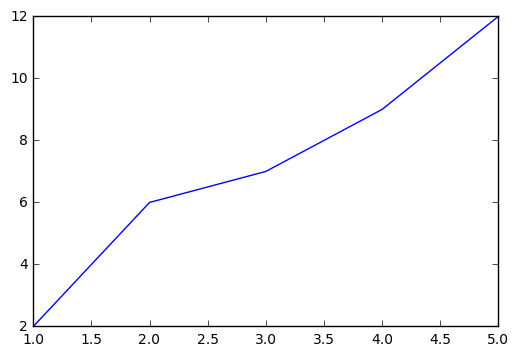

In [29]:
plt.plot(x,y)
plt.show()

## Read Data from CSV 

In [46]:
data_frame = pd.read_csv('/home/emu/JupyterNotebook/FirstTry/pima-data.csv')

In [47]:
data_frame.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True


In [14]:
print data_frame.isnull().values.any()

False


## Generate Heatmap to find the redundant data

In [30]:
def corr_heatmap(data_frame, size=11):
    correlation = data_frame.corr()
    fig, heatmap = plt.subplots(figsize=(size,size))
    heatmap.matshow(correlation)
    plt.xticks(range(len(correlation.columns)), correlation.columns)
    plt.yticks(range(len(correlation.columns)), correlation.columns)
    plt.show()

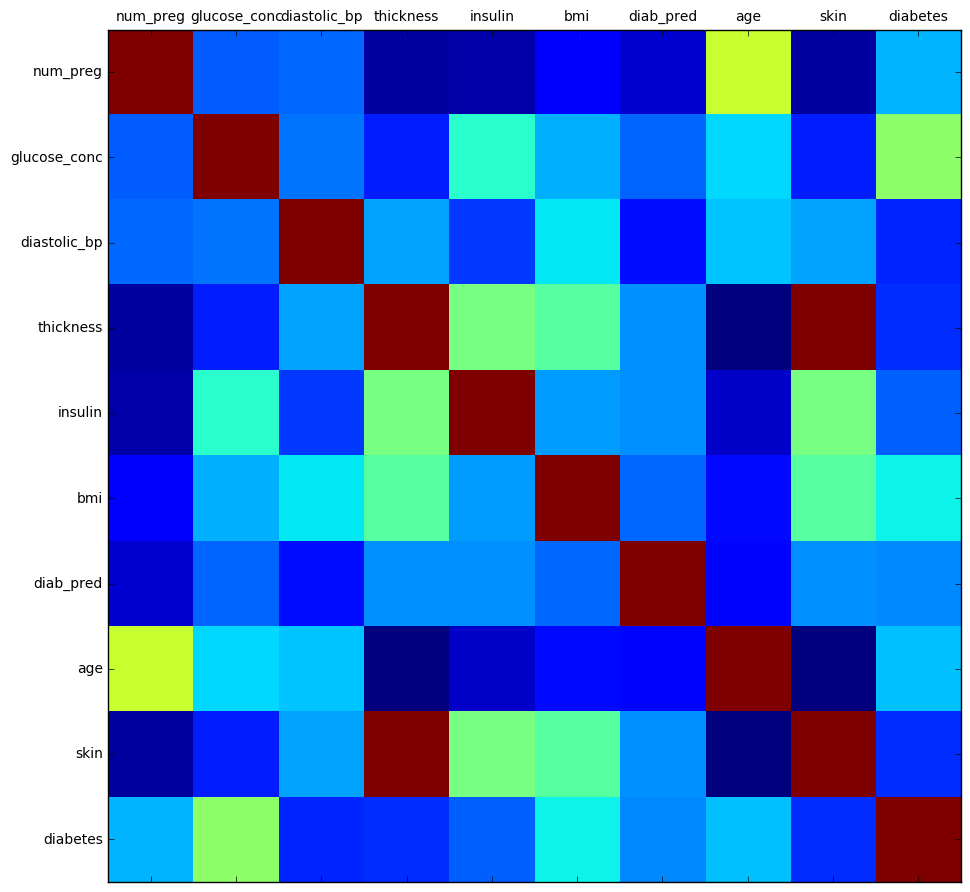

In [31]:
corr_heatmap(data_frame)

## Clean redundant data

In [32]:
del data_frame['skin']
data_frame.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True


## Data Molding
Replace values so that we can fit data in different models

In [34]:
map_boolean_values = {True: 1, False: 0}
data_frame['diabetes'] = data_frame['diabetes'].map(map_boolean_values)
data_frame.head(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## Some general calculations
Find no. of diabetes paitents 

In [45]:
no_of_1 = 0
no_of_0 = 0

no_of_1 = len(data_frame.loc[data_frame['diabetes'] == True])
no_of_0 = len(data_frame.loc[data_frame['diabetes'] == False])
    
print "Number of Diabetes Paitent: ", no_of_1

Number of Diabetes Paitent:  268
